# Decision tree for patients and medications

---

In [7]:
# Import libs
import pandas as pd
from matplotlib import pyplot as plot
import sklearn.tree
from sklearn.preprocessing import LabelEncoder

In [4]:
# reading data
patiens_data = pd.read_csv('Patients.csv')
patiens_data

,Patient,Age,Gender,BloodPressure,Cholesterol,Medication
0,p1,Young,F,High,Normal,A
1,p2,Young,F,High,High,A
2,p3,Middle-Aged,F,High,Normal,B
3,p4,Elderly,F,Normal,Normal,B
4,p5,Elderly,M,Low,Normal,B
5,p6,Elderly,M,Low,High,A
6,p7,Middle-Aged,M,Low,High,B
7,p8,Young,F,Normal,Normal,A
8,p9,Young,M,Low,Normal,B
9,p10,Elderly,M,Normal,Normal,B


In [23]:
# Changing all variables into numeric values
age = LabelEncoder()
gender = LabelEncoder()
bloodPressure = LabelEncoder()
cholesterol = LabelEncoder()
medication = LabelEncoder()

In [24]:
# Now let's change our data into numeric data in our dataFrame
patiens_numeric_data = patiens_data.copy()
patiens_numeric_data.columns

Index(['Patient', 'Age', 'Gender', 'BloodPressure', 'Cholesterol',
       'Medication'],
      dtype='object')

In [25]:
patiens_numeric_data['Age'] = age.fit_transform(patiens_data['Age'])
patiens_numeric_data['Gender'] = gender.fit_transform(patiens_data['Gender'])
patiens_numeric_data['BloodPressure'] = bloodPressure.fit_transform(patiens_data['BloodPressure'])
patiens_numeric_data['Cholesterol'] = cholesterol.fit_transform(patiens_data['Cholesterol'])
patiens_numeric_data['Medication'] = medication.fit_transform(patiens_data['Medication'])

patiens_numeric_data

,Patient,Age,Gender,BloodPressure,Cholesterol,Medication
0,p1,2,0,0,1,0
1,p2,2,0,0,0,0
2,p3,1,0,0,1,1
3,p4,0,0,2,1,1
4,p5,0,1,1,1,1
5,p6,0,1,1,0,0
6,p7,1,1,1,0,1
7,p8,2,0,2,1,0
8,p9,2,1,1,1,1
9,p10,0,1,2,1,1


In [26]:
# Preparing data obj and data for training.
training = patiens_numeric_data[['Age', 'Gender', 'BloodPressure', 'Cholesterol']]
objective = patiens_numeric_data.Medication

In [28]:
# Trainnig
tree = sklearn.tree.DecisionTreeClassifier(criterion='gini')
tree.fit(training, objective)

DecisionTreeClassifier()

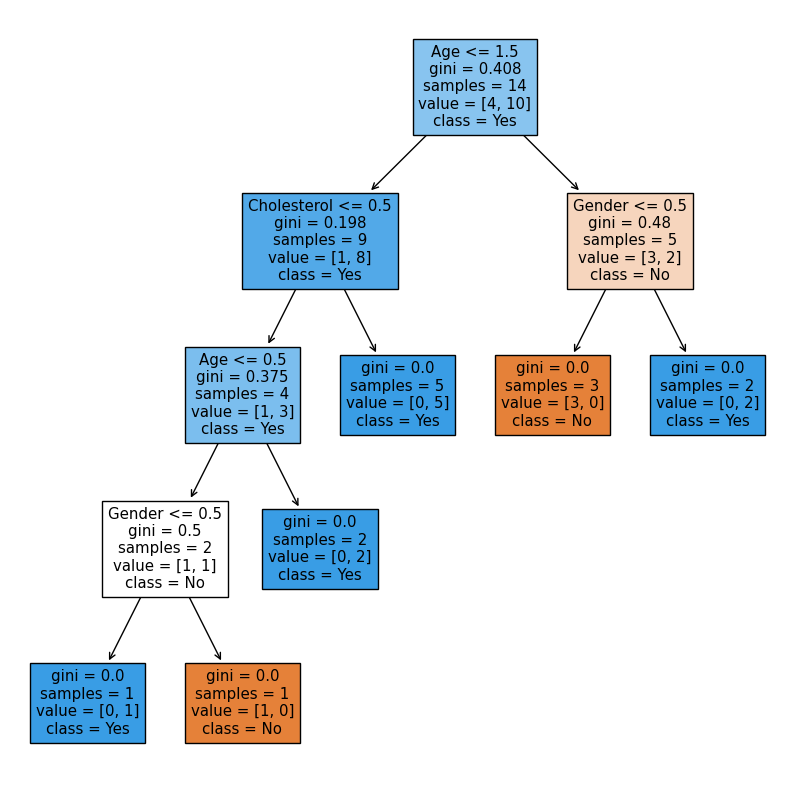

In [33]:
# plot
features_cols = ['Age', 'Gender', 'BloodPressure', 'Cholesterol']
px = 1/plot.rcParams['figure.dpi']  # Pixel in pulgadas
fig = plot.figure(figsize=(1000*px,1000*px)) 
_ = sklearn.tree.plot_tree(tree, feature_names=features_cols, class_names=['No','Yes'], filled=True)



In [36]:
# Let's test our data
age = [1] # 'Middle-Aged'
gender = [0] # 'F'
bloodPressure = [1] # 'Low'
cholesterol = [1] # 'Normal'
test_data = pd.DataFrame({
    'Age': age,
    'Gender': gender,
    'BloodPressure': bloodPressure,
    'Cholesterol': cholesterol
})


In [39]:
prediction = tree.predict(test_data)
prediction[0]

1

In [40]:
if prediction[0] == 1:
    print("The medication is B")
else:
    print("The medication is A")

The medication is B
